<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_practice_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [51]:
import pandas as pd

Дані про морське вухо(молюск)

<div>
<img src="https://m.media-amazon.com/images/I/81-FC5TlLtL.jpg" width="500"/>
</div>

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/abalone.csv')
df.drop(columns=['Type', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], inplace=True)

In [53]:
df.head()

,LongestShell,Diameter,Height,Rings
0,0.455,0.365,0.095,15
1,0.350,0.265,0.090,7
2,0.530,0.420,0.135,9
3,0.440,0.365,0.125,10
4,0.330,0.255,0.080,7


Потрібно на основі розмірів молюска спрогнозувати кількість кілець в мушлі `Rings`. Використовуйте процесор cpu

# Завдання 1
Створіть клас Dataset

In [54]:
from torch.utils.data import Dataset
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values).to(device)
      self.y = torch.FloatTensor(y.values).to(device)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['Rings'])
y = df['Rings']

dataset = MyDataset(X, y)

# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [55]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,  # датасет з даними
                        batch_size=batch_size,  # кількість даних в одному пакеті
                        shuffle=True,  # чи треба перемішувати дані
                        generator=torch.Generator(device=device))

In [56]:
X_batch, y_batch = next(iter(dataloader))

In [57]:
X_batch.shape

torch.Size([128, 3])

In [58]:
y_batch.shape

torch.Size([128, 1])

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-3
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [59]:
from torch import nn


model = nn.Sequential(
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.LeakyReLU(),
    nn.Linear(3,1),

)

model

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=1, bias=True)
)

In [60]:
X_batch

tensor([[0.6150, 0.5250, 0.1550],
        [0.3200, 0.2400, 0.0750],
        [0.5000, 0.3650, 0.1300],
        [0.5050, 0.4100, 0.1500],
        [0.5650, 0.5050, 0.2100],
        [0.6050, 0.4750, 0.1450],
        [0.3800, 0.2350, 0.1000],
        [0.5500, 0.4500, 0.1300],
        [0.5100, 0.4000, 0.1400],
        [0.5300, 0.4350, 0.1550],
        [0.4600, 0.3500, 0.1100],
        [0.6450, 0.5150, 0.2400],
        [0.5300, 0.4200, 0.1300],
        [0.6550, 0.5200, 0.1750],
        [0.4450, 0.3450, 0.1200],
        [0.4250, 0.3250, 0.1100],
        [0.4700, 0.3650, 0.1200],
        [0.5650, 0.4400, 0.1350],
        [0.6250, 0.5250, 0.1950],
        [0.5750, 0.4550, 0.1450],
        [0.4150, 0.3150, 0.1200],
        [0.6000, 0.4750, 0.1600],
        [0.6050, 0.4700, 0.1600],
        [0.3750, 0.3050, 0.0900],
        [0.5700, 0.4700, 0.1550],
        [0.6100, 0.4800, 0.1750],
        [0.3700, 0.2750, 0.0800],
        [0.6400, 0.4850, 0.1600],
        [0.6500, 0.5250, 0.1900],
        [0.385

# Завдання 4
Визначте функцію втрат та оптимізатор

In [61]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [62]:
import numpy as np

num_epochs = 20
losses = []

for epoch in range(num_epochs):
  losses_ = []
  for X_batch, y_batch in dataloader:
        # пряме пошерення
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())

        # Зворотнє поширення
        loss.backward() # рахуємо градієнти
        optimizer.step()
        optimizer.zero_grad()

  losses.append(np.mean(losses_))

  if epoch % 1 == 0:
          print(f'loss={losses[-1]}')


loss=103.34577479506984
loss=55.86628266536828
loss=11.587024370829264
loss=8.972129951823842
loss=8.920409448219068
loss=8.76834162798795
loss=8.785743323239414
loss=8.713045076890426
loss=8.629779208790172
loss=8.542402325254498
loss=8.486789775617195
loss=8.419427785006436
loss=8.395421114834873
loss=8.340890494259922
loss=8.268209009459525
loss=8.29513424093073
loss=8.202631892579975
loss=8.169310800956957
loss=8.082313797690652
loss=8.085615013584945


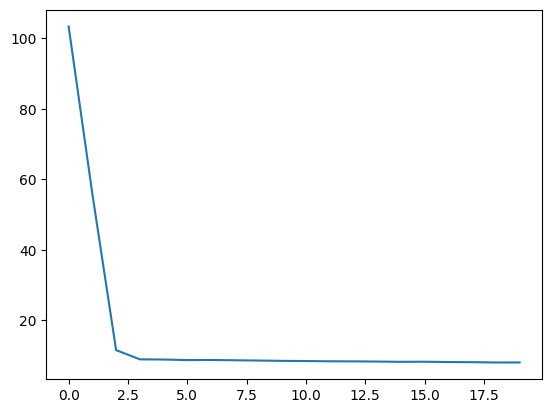

In [64]:
import matplotlib.pyplot as plt

plt.plot(losses)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [67]:
torch.save(model, 'model.pt')

In [66]:

load_model = torch.load('model.pt')

<ipython-input-66-2cff9b381423>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model = torch.load('model.pt')


In [68]:
load_model

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=1, bias=True)
)

In [69]:
X.iloc[:1]

,LongestShell,Diameter,Height
0,0.455,0.365,0.095


In [70]:
X_data = torch.FloatTensor(X.iloc[:1].values)
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)

tensor([[0.4550, 0.3650, 0.0950]])
torch.Size([1, 3])


In [71]:
load_model(X_data) # порахує грабієнти

tensor([[9.5056]], grad_fn=<AddmmBackward0>)

In [72]:
with torch.no_grad(): # без градієнтів
  print(load_model(X_data))

tensor([[9.5056]])
